In [2]:
cd ..

/Users/lisawink/Documents/freiburg


In [3]:
import pandas as pd
import calc_params
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
from importlib import reload

In [5]:
reload(calc_params)

<module 'calc_params' from '/Users/lisawink/Documents/freiburg/calc_params.py'>

# Meteobikes

Meteobike dara from 29th June 2022

In [6]:
mbike = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2022-06-29.csv')

In [6]:
bldgs = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_buildings_3D.parquet')
streets = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_streets.parquet')
nodes = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_nodes.parquet')

# If running for the first time

In [ ]:
i = 200
stn_buffers = calc_params.buffer_stations(mbike, radius=200, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
stn_buffers = calc_params.neighbourhood_graph_params(bldgs, stn_buffers)
b,s,n = calc_params.select_objects(bldgs, streets, nodes, stn_buffers)


In [ ]:
stn_buffers = calc_params.aggregate_params(b,s,n, stn_buffers)


In [ ]:
skv_path = '/Users/lisawink/Documents/paper1/data/processed_data/SVF.tif'
print(stn_buffers)
stn_buffers = calc_params.agg_raster(skv_path, stn_buffers, 'SVF')
stn_buffers.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/processed_station_params_' + str(i) + '.parquet')

In [28]:
stn_buffers.to_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/processed_station_params_' + str(i) + '.parquet')

In [29]:
stn_buffers

System_ID                  Time_UTC  Seconds_in_day  Altitude  \
0             1  2022-06-29T19:32:52.000Z           70371     292.1   
1             1  2022-06-29T19:33:01.000Z           70381     293.6   
2             1  2022-06-29T19:33:07.000Z           70386     294.6   
3             1  2022-06-29T19:33:16.000Z           70396     294.8   
4             1  2022-06-29T19:33:44.000Z           70423     283.2   
...         ...                       ...             ...       ...   
9725         99  2022-06-29T21:32:01.000Z           77521     285.3   
9726         99  2022-06-29T21:32:10.000Z           77529     286.3   
9727         99  2022-06-29T21:32:19.000Z           77539     288.6   
9728         99  2022-06-29T21:32:44.000Z           77564     287.3   
9729         99  2022-06-29T21:32:53.000Z           77573     288.9   

       Latitude  Longitude  Temperature_diff_K  Absolute_temperature_degC  \
0     47.993525   7.845168                0.02                      24.60   
1     47.993805   7.845362               -0.01                      24.50   
2     47.994033   7.845457               -0.01                      24.50   
3     47.994367   7.845562               -0.01                      24.50   
4     47.995337   7.845955               -0.01                      24.50   
...         ...        ...                 ...                        ...   
9725  47.992468   7.848665                0.76                      21.62   
9726  47.992602   7.848607                0.76                      21.62   
9727  47.992720   7.847900                0.76                      21.62   
9728  47.993572   7.845558                0.66                      21.52   
9729  47.993548   7.845003                0.55                      21.42   

      Relhumidity_diff_percent  Relhumidity_percent  ...  StrSCl_MAD  \
0                          8.1                 64.2  ...    0.038345   
1                          8.1                 64.2  ...    0.034856   
2                          8.1                 64.2  ...    0.015625   
3                          8.0                 64.2  ...    0.000000   
4                          8.0                 64.2  ...    0.000000   
...                        ...                  ...  ...         ...   
9725                       2.3                 73.4  ...    0.000000   
9726                       2.4                 73.4  ...    0.000000   
9727                       2.4                 73.4  ...    0.000000   
9728                       2.5                 73.6  ...    0.000000   
9729                       2.6                 73.7  ...    0.028205   

      StrSCl_skew StrSCl_per25  StrSCl_per75     BuCAR  \
0        0.296830          0.0      0.076923  0.391041   
1        0.791646          0.0      0.076923  0.388707   
2        0.848364          0.0      0.076923  0.380502   
3        0.527021          0.0      0.071795  0.407643   
4        0.916421          0.0      0.043478  0.473701   
...           ...          ...           ...       ...   
9725     0.854451          0.0      0.071429  0.485506   
9726     0.993033          0.0      0.065126  0.487488   
9727     0.854451          0.0      0.071429  0.461838   
9728     0.858686          0.0      0.076923  0.412648   
9729     0.191667          0.0      0.076923  0.397302   

                                                    SVF  SVF_mean   SVF_std  \
0     {'min': 0.009895248338580132, 'max': 1.0, 'mea...  0.631997  0.259620   
1     {'min': 0.009895248338580132, 'max': 1.0, 'mea...  0.644738  0.253144   
2     {'min': 0.009895248338580132, 'max': 1.0, 'mea...  0.645806  0.252715   
3     {'min': 0.009895248338580132, 'max': 1.0, 'mea...  0.651616  0.249002   
4     {'min': 0.005841491743922234, 'max': 1.0, 'mea...  0.670380  0.243410   
...                                                 ...       ...       ...   
9725  {'min': 0.010926200076937675, 'max': 1.0, 'mea...  0.607921  0.263814   
9726  {'min': 0.010926200076937675

# If running again

In [7]:
stn_buffers =  gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/mbike/processed_station_params_200.parquet')

In [38]:
stn_buffers = stn_buffers.dropna(thresh=stn_buffers.shape[0] - 1500, axis=1)
stn_buffers = stn_buffers.dropna()

In [39]:
stn_buffers

System_ID                  Time_UTC  Seconds_in_day  Altitude  \
0             1  2022-06-29T19:32:52.000Z           70371     292.1   
1             1  2022-06-29T19:33:01.000Z           70381     293.6   
2             1  2022-06-29T19:33:07.000Z           70386     294.6   
3             1  2022-06-29T19:33:16.000Z           70396     294.8   
4             1  2022-06-29T19:33:44.000Z           70423     283.2   
...         ...                       ...             ...       ...   
9725         99  2022-06-29T21:32:01.000Z           77521     285.3   
9726         99  2022-06-29T21:32:10.000Z           77529     286.3   
9727         99  2022-06-29T21:32:19.000Z           77539     288.6   
9728         99  2022-06-29T21:32:44.000Z           77564     287.3   
9729         99  2022-06-29T21:32:53.000Z           77573     288.9   

       Latitude  Longitude  Temperature_diff_K  Absolute_temperature_degC  \
0     47.993525   7.845168                0.02                      24.60   
1     47.993805   7.845362               -0.01                      24.50   
2     47.994033   7.845457               -0.01                      24.50   
3     47.994367   7.845562               -0.01                      24.50   
4     47.995337   7.845955               -0.01                      24.50   
...         ...        ...                 ...                        ...   
9725  47.992468   7.848665                0.76                      21.62   
9726  47.992602   7.848607                0.76                      21.62   
9727  47.992720   7.847900                0.76                      21.62   
9728  47.993572   7.845558                0.66                      21.52   
9729  47.993548   7.845003                0.55                      21.42   

      Relhumidity_diff_percent  Relhumidity_percent  ...  StrSCl_IQR  \
0                          8.1                 64.2  ...    0.076923   
1                          8.1                 64.2  ...    0.076923   
2                          8.1                 64.2  ...    0.076923   
3                          8.0                 64.2  ...    0.071795   
4                          8.0                 64.2  ...    0.043478   
...                        ...                  ...  ...         ...   
9725                       2.3                 73.4  ...    0.071429   
9726                       2.4                 73.4  ...    0.065126   
9727                       2.4                 73.4  ...    0.071429   
9728                       2.5                 73.6  ...    0.076923   
9729                       2.6                 73.7  ...    0.076923   

      StrSCl_MAD StrSCl_per25  StrSCl_per75     BuCAR  \
0       0.038345          0.0      0.076923  0.391041   
1       0.034856          0.0      0.076923  0.388707   
2       0.015625          0.0      0.076923  0.380502   
3       0.000000          0.0      0.071795  0.407643   
4       0.000000          0.0      0.043478  0.473701   
...          ...          ...           ...       ...   
9725    0.000000          0.0      0.071429  0.485506   
9726    0.000000          0.0      0.065126  0.487488   
9727    0.000000          0.0      0.071429  0.461838   
9728    0.000000          0.0      0.076923  0.412648   
9729    0.028205          0.0      0.076923  0.397302   

                                                    SVF  SVF_mean   SVF_std  \
0     {'count': 125089, 'max': 1.0, 'mean': 0.631996...  0.631997  0.259620   
1     {'count': 125087, 'max': 1.0, 'mean': 0.644738...  0.644738  0.253144   
2     {'count': 125082, 'max': 1.0, 'mean': 0.645805...  0.645806  0.252715   
3     {'count': 125080, 'max': 1.0, 'mean': 0.651616...  0.651616  0.249002   
4     {'count': 125102, 'max': 1.0, 'mean': 0.670379...  0.670380  0.243410   
...                                                 ...       ...       ...   
9725  {'count': 125099, 'max': 1.0, 'mean': 0.607920...  0.607921  0.263814   
9726  {'count': 125102, 'max': 1.0, 'mean': 0.

In [35]:
# print dropped columns
for i in stn_buffers.columns.difference(stn_buffers.dropna(thresh=stn_buffers.shape[0] - 1500, axis=1).columns):
    print(i)

BpM_IQR
BpM_MAD
BpM_skew
BuCf_3D_IQR
BuCf_3D_MAD
BuCf_3D_skew
BuCir_IQR
BuCir_MAD
BuCir_skew
BuCon_3D_IQR
BuCon_3D_MAD
BuCon_3D_skew
BuCube_3D_IQR
BuCube_3D_MAD
BuCube_3D_skew
BuCubo_3D_IQR
BuCubo_3D_MAD
BuCubo_3D_skew
BuDep_3D_IQR
BuDep_3D_MAD
BuDep_3D_skew
BuDep_IQR
BuDep_MAD
BuDep_skew
BuDisp_3D_IQR
BuDisp_3D_MAD
BuDisp_3D_skew
BuDisp_IQR
BuDisp_MAD
BuDisp_skew
BuEPI_3D_IQR
BuEPI_3D_MAD
BuEPI_3D_skew
BuEx_3D_IQR
BuEx_3D_MAD
BuEx_3D_skew
BuEx_IQR
BuEx_MAD
BuEx_skew
BuFF_3D_IQR
BuFF_3D_MAD
BuFF_3D_skew
BuFF_IQR
BuFF_MAD
BuFF_skew
BuFra_3D_IQR
BuFra_3D_MAD
BuFra_3D_skew
BuFra_IQR
BuFra_MAD
BuFra_skew
BuGir_3D_IQR
BuGir_3D_MAD
BuGir_3D_skew
BuGir_IQR
BuGir_MAD
BuGir_skew
BuHem_3D_IQR
BuHem_3D_MAD
BuHem_3D_skew
BuHt_IQR
BuHt_MAD
BuHt_skew
BuMVE_3D_IQR
BuMVE_3D_MAD
BuMVE_3D_skew
BuPerC_IQR
BuPerC_MAD
BuPerC_skew
BuProx_3D_IQR
BuProx_3D_MAD
BuProx_3D_skew
BuProx_IQR
BuProx_MAD
BuProx_skew
BuRan_3D_IQR
BuRan_3D_MAD
BuRan_3D_skew
BuRan_IQR
BuRan_MAD
BuRan_skew
BuRough_3D_IQR
BuRough_3D_MAD
B

In [ ]:
# drop 

MSE: 0.5917517836674249
R2: 0.5421029293871137


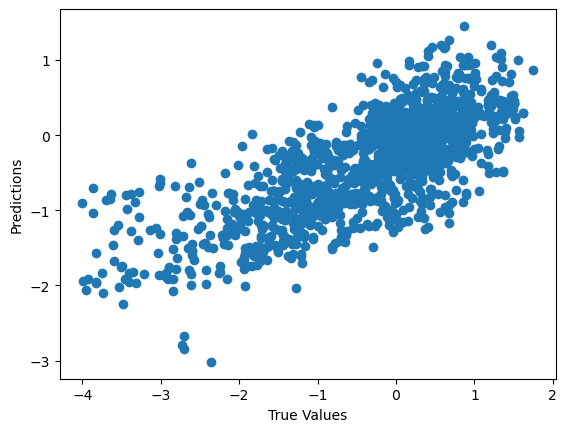

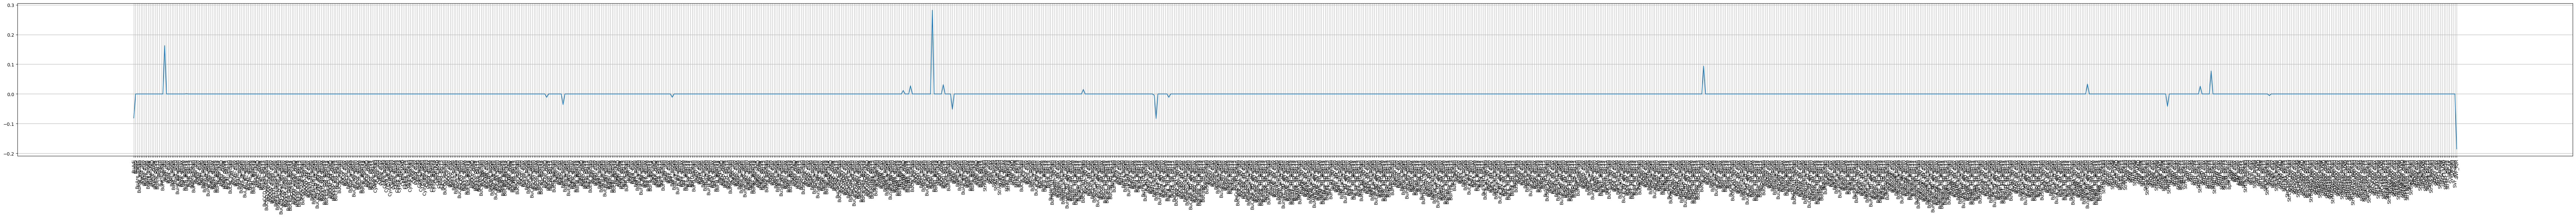

In [41]:
# perform lasso regression of the station paramers with Temperature_diff_K
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = stn_buffers.drop(columns=['System_ID', 'Time_UTC', 'Seconds_in_day', 'Altitude', 'Latitude','Longitude', 'Temperature_diff_K', 'Absolute_temperature_degC','Relhumidity_diff_percent', 'Relhumidity_percent','Vapourpressure_diff_hPa','Vapourpressure_hPa','geometry','station_id','SVF'])
y = stn_buffers['Temperature_diff_K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# plot the coefficients of the lasso regression
plt.figure(figsize=(100, 6))
plt.plot(range(len(lasso.coef_)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.grid()
plt.show()


In [44]:
# show the most important features
print(X.columns[abs(lasso.coef_) > 0.01])



Index(['BuAdj', 'BuHt_std', 'BuCon_skew', 'BuElo_mode', 'BuFF_mode',
       'BuSWR_MAD', 'BuOri_mean', 'BuOri_wsum', 'BuOri_per25', 'BuAli_min',
       'BuCon_3D_median', 'BuFra_3D_wmean', 'BuFra_3D_wper75', 'BuGir_std',
       'BuSWR_3D_wmedian', 'StrWD_mean', 'StrHD_median', 'StrHD_per75',
       'SVF_IQR'],
      dtype='object')


In [10]:
X_train

BuAdj      BuIBD  BuAre_mean  BuAre_median   BuAre_std  BuAre_min  \
7558  0.784605  29.656268  253.679646    204.103964  190.703331  57.200041   
4999  0.505508  27.571120  370.789253    151.968444  871.640849  26.828396   
1561  0.875000  80.397696  129.556517    153.339475   61.889878  59.302934   
8805  0.233169  10.583750  282.499226    162.579474  364.715599   5.796970   
6408  0.353368  18.577803  236.772064    181.203973  168.674482  53.406779   
...        ...        ...         ...           ...         ...        ...   
5734  0.322684  18.988732  276.183716    172.057633  368.300715  41.218348   
5191  0.440513  25.487722   95.172045     73.034707   65.083150  14.178489   
5390  0.810555  25.459391  150.725605    136.019838   96.654103  17.049330   
860   0.856170  19.635393  260.276865    115.550166  659.275860   6.088286   
7270  0.309382  16.808800  251.347699    170.764336  226.129726  24.885921   

        BuAre_max     BuAre_sum  BuAre_mode   BuAre_IQR  ...  StrSCl_MAD  \
7558  1157.064968  21309.090259   57.200041  113.068154  ...    0.035714   
4999  6362.869885  25955.247731   26.828396  219.088106  ...    0.000000   
1561   176.027142    388.669551   59.302934   58.362104  ...         NaN   
8805  2343.794974  56499.845217    5.796970  160.383611  ...    0.000000   
6408   912.882999  27702.331496   53.406779  114.763423  ...    0.000000   
...           ...           ...         ...         ...  ...         ...   
5734  2821.829326  23475.615859   41.218348  128.655711  ...    0.000000   
5191   418.119827  15703.387409   14.178489   61.641793  ...    0.025000   
5390   578.665326  10098.615552   17.049330   93.605513  ...    0.000000   
860   5744.838881  21602.979825    6.088286  115.806619  ...    0.000000   
7270  1349.575468  27145.551524   24.885921  134.321941  ...    0.020000   

      StrSCl_skew  StrSCl_per25  StrSCl_per75     BuCAR  \
7558     0.063489           0.0      0.075549  0.169845   
4999     0.980467           0.0      0.038462  0.206877   
1561          NaN           NaN           NaN  0.003098   
8805     0.779651           0.0      0.072802  0.450335   
6408     1.024350           0.0      0.090909  0.220803   
...           ...           ...           ...       ...   
5734     1.494238           0.0      0.025862  0.187113   
5191     0.264773           0.0      0.070192  0.125165   
5390     2.041241           0.0      0.000000  0.080491   
860      0.408248           0.0      0.090909  0.172188   
7270     0.684808           0.0      0.129870  0.216365   

                                                    SVF  SVF_mean   SVF_std  \
7558  {'count': 125084, 'max': 0.9971613883972168, '...  0.369138  0.272685   
4999  {'count': 125084, 'max': 1.0, 'mean': 0.742967...  0.742968  0.205795   
1561  {'count': 125100, 'max': 1.0, 'mean': 0.918182...  0.918182  0.163717   
8805  {'count': 125081, 'max': 1.0, 'mean': 0.610292...  0.610293  0.260009   
6408  {'count': 125087, 'max': 1.0, 'mean': 0.598594...  0.598594  0.253857   
...                                                 ...       ...       ...   
5734  {'count': 125085, 'max': 1.0, 'mean': 0.529188...  0.529188  0.268719   
5191  {'count': 125102, 'max': 1.0, 'mean': 0.736566...  0.736566  0.225609   
5390  {'count': 125097, 'max': 0.9943228363990784, '...  0.416437  0.309902   
860   {'count': 125102, 'max': 1.0, 'mean': 0.640256...  0.640257  0.251195   
7270  {'count': 125083, 'max': 1.0, 'mean': 0.616676...  0.616677  0.256458   

      SVF_median   SVF_IQR  
7558    0.336878  0.450809  
4999    0.798936  0.255411  
1561    1.000000  0.085863  
8805    0.632941  0.425508  
6408    0.627924  0.365340  
...          ...       ...  
5734    0.561893  0.426913  
5191    0.796339  0.298636  
5390    0.414428  0.619830  
860     0.696587  0.337342  
7270    0.664711  0.388008  

[7784 rows x 1417 columns]

<Axes: xlabel='StrHW_median', ylabel='Absolute_temperature_degC'>

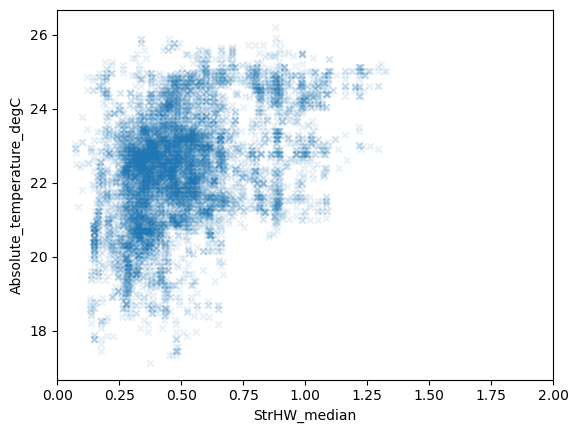

In [10]:
stn_buffers[['StrHW_median','Absolute_temperature_degC']].plot(x='StrHW_median', y='Absolute_temperature_degC', kind='scatter',marker='x',xlim=(0,2),alpha=0.1)

<Axes: xlabel='BuCAR', ylabel='Absolute_temperature_degC'>

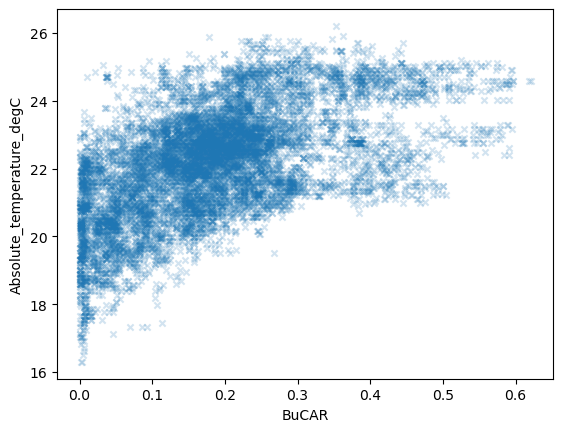

In [11]:
stn_buffers[['BuCAR','Absolute_temperature_degC']].plot(x='BuCAR', y='Absolute_temperature_degC', kind='scatter',marker='x',alpha=0.2)

In [13]:
params[i]

'BuAre_sum'

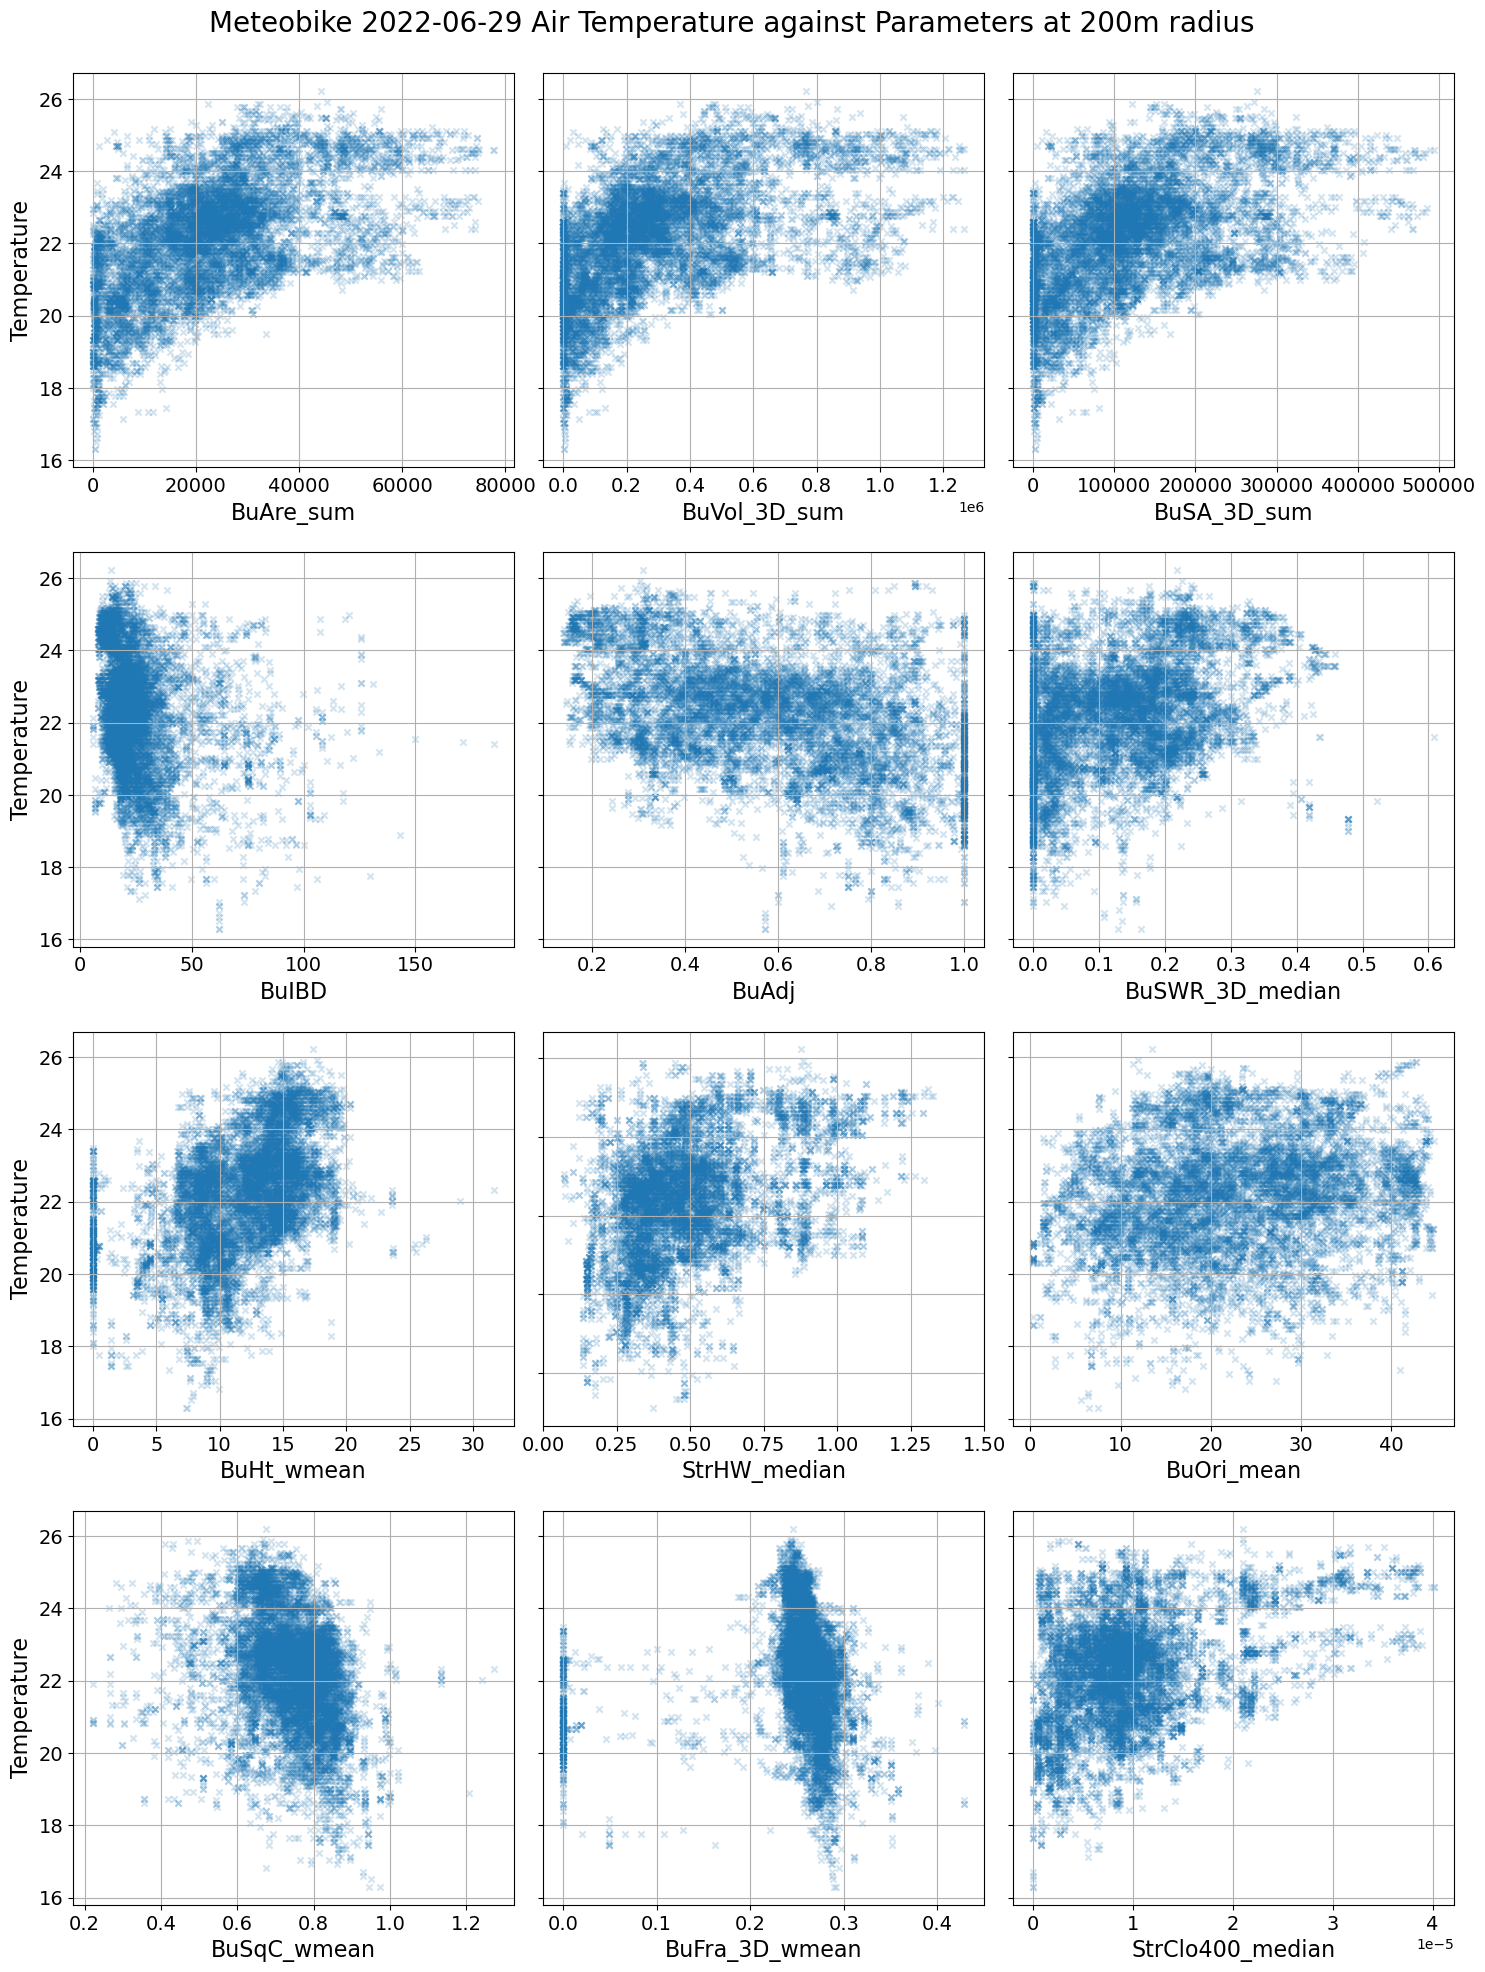

In [20]:
# make 3 by 4 plot with the following parameters
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuSA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','BuOri_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

fig, axs = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Meteobike 2022-06-29 Air Temperature against Parameters at 200m radius', fontsize=20, y=0.99)
#fig.subplots_adjust(wspace=0.1)
for i, ax in enumerate(axs.flat):
    if params[i] == 'StrHW_median':
        stn_buffers[['StrHW_median','Absolute_temperature_degC']].plot(x='StrHW_median', y='Absolute_temperature_degC', ax=ax, kind='scatter',marker='x',xlim=(0,1.5),alpha=0.2)
    else:
        stn_buffers[[params[i],'Absolute_temperature_degC']].plot(x=params[i], y='Absolute_temperature_degC', ax=ax, kind='scatter',marker='x',alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel(params[i],fontsize=16)
    ax.set_ylabel('Temperature',fontsize=16)
    ax.grid()

    if i % 3 != 0:  # 1st column (index 0, 3, 6, ...) keeps labels
        ax.set_ylabel("")  # Remove y-axis label
        ax.yaxis.set_ticklabels([])  # Remove y-axis ticks
        

plt.tight_layout(pad = 2, w_pad=0.01)
plt.savefig('/Users/lisawink/Documents/paper1/figures/mbike_200m.png')
plt.savefig('/Users/lisawink/Documents/paper1/figures/mbike_200m.pdf')
plt.show()

In [19]:
features = stn_buffers.drop(columns=['System_ID', 'Time_UTC', 'Seconds_in_day', 'Altitude', 'Latitude','Longitude', 'Temperature_diff_K', 'Absolute_temperature_degC','Relhumidity_diff_percent', 'Relhumidity_percent','Vapourpressure_diff_hPa','Vapourpressure_hPa','geometry','station_id','SVF']).columns

In [52]:
# drop all features ending with mode IQR MAD skew per25 per75 min max wmin wmax wsum per25 wper75
features = features[~features.str.contains('mode|IQR|MAD|skew|per25|per75|min|max|wmin|wmax|wsum|per25|wper75')]

In [30]:
features

Index(['BuAdj', 'BuIBD', 'BuAre_mean', 'BuAre_median', 'BuAre_std',
       'BuAre_min', 'BuAre_max', 'BuAre_sum', 'BuAre_mode', 'BuAre_IQR',
       ...
       'StrSCl_IQR', 'StrSCl_MAD', 'StrSCl_skew', 'StrSCl_per25',
       'StrSCl_per75', 'BuCAR', 'SVF_mean', 'SVF_std', 'SVF_median',
       'SVF_IQR'],
      dtype='object', length=1416)

In [34]:
pd.DataFrame(features[~features.str.contains('mean|std|mode|MAD|skew|per25|per75|min|max|wmedian|wmin|wmax|wsum|per25|wper75')]).to_csv('sum_mean_median_features.csv',index=False)

In [33]:
features[~features.str.contains('mean|std|mode|MAD|skew|per25|per75|min|max|wmedian|wmin|wmax|wsum|per25|wper75')]

Index(['BuAdj', 'BuIBD', 'BuAre_median', 'BuAre_sum', 'BuAre_IQR', 'BuNum',
       'BuHt_median', 'BuHt_sum', 'BuHt_IQR', 'BuPer_median',
       ...
       'StrENR400_IQR', 'StrDeg_median', 'StrDeg_sum', 'StrDeg_IQR',
       'StrSCl_median', 'StrSCl_sum', 'StrSCl_IQR', 'BuCAR', 'SVF_median',
       'SVF_IQR'],
      dtype='object', length=234)

In [24]:
# replace _3D with 3D in features
features = features.str.replace('_3D','3D')

In [25]:
unique_prefixes = features.str.split('_').str[0].unique()

In [29]:
unique_prefixes

Index(['BuAdj', 'BuIBD', 'BuAre', 'BuNum', 'BuHt', 'BuPer', 'BuLAL', 'BuCCD',
       'BuCor', 'CyAre', 'CyInd', 'BuCCo', 'BuCWA', 'BuCon', 'BuElo', 'BuERI',
       'BuFR', 'BuFF', 'BuFD', 'BuRec', 'BuShI', 'BuSqC', 'BuCorDev', 'BuSWR',
       'BuOri', 'BuAli', 'StrAli', 'BuCir', 'BuHem3D', 'BuCon3D', 'BuFra',
       'BuFra3D', 'BuCubo3D', 'BuSqu', 'BuCube3D', 'BumVE3D', 'BuMVE3D',
       'BuFF3D', 'BuEPI3D', 'BuProx', 'BuProx3D', 'BuEx', 'BuEx3D', 'BuSpi',
       'BuSpi3D', 'BuPerC', 'BuCf3D', 'BuDep', 'BuDep3D', 'BuGir', 'BuGir3D',
       'BuDisp', 'BuDisp3D', 'BuRan', 'BuRan3D', 'BuRough', 'BuRough3D',
       'BuSWA3D', 'BuSurf3D', 'BuVol3D', 'BuSA3D', 'BuSWR3D', 'StrLen', 'StrW',
       'StrOpe', 'StrWD', 'StrH', 'StrHD', 'StrHW', 'BpM', 'StrLin', 'StrCNS',
       'StrClo400', 'StrBet400', 'StrMes400', 'StrGam400', 'StrCyc400',
       'StrENR400', 'StrDeg', 'StrSCl', 'BuCAR', 'SVF'],
      dtype='object')

In [23]:
features.str.split('_').str[1].unique()

Index([      nan,    'mean',  'median',     'std',     'min',     'max',
           'sum',    'mode',     'IQR',     'MAD',    'skew',   'per25',
         'per75',   'wmean',    'wstd', 'wmedian',    'wmin',    'wmax',
          'wsum',  'wper25',  'wper75',      '3D'],
      dtype='object')

In [28]:
pd.DataFrame(unique_prefixes).to_csv('unique_prefixes.csv', index=False)

In [16]:
features.str.split('_')

Index([          ['BuAdj'],           ['BuIBD'],   ['BuAre', 'mean'],
       ['BuAre', 'median'],    ['BuAre', 'std'],    ['BuAre', 'min'],
          ['BuAre', 'max'],    ['BuAre', 'sum'],   ['BuAre', 'mode'],
          ['BuAre', 'IQR'],
       ...
         ['StrSCl', 'IQR'],   ['StrSCl', 'MAD'],  ['StrSCl', 'skew'],
       ['StrSCl', 'per25'], ['StrSCl', 'per75'],           ['BuCAR'],
           ['SVF', 'mean'],      ['SVF', 'std'],   ['SVF', 'median'],
            ['SVF', 'IQR']],
      dtype='object', length=1416)

In [17]:
# remove everything after the last underscore
features = features.str.split('_').str[0].unique()

In [18]:
features

<bound method Index.unique of Index(['BuAdj', 'BuIBD', 'BuAre', 'BuAre', 'BuAre', 'BuAre', 'BuAre', 'BuAre',
       'BuAre', 'BuAre',
       ...
       'StrSCl', 'StrSCl', 'StrSCl', 'StrSCl', 'StrSCl', 'BuCAR', 'SVF', 'SVF',
       'SVF', 'SVF'],
      dtype='object', length=1416)>

In [71]:
# for each unique prefix keep wmedian and if wmedian doesn't exist then keep median

new_features = []
for prefix in unique_prefixes:
    if prefix + '_wmedian' in X.columns:
        new_features.append(prefix + '_wmedian')
    elif prefix + '_median' in X.columns:
        new_features.append(prefix + '_median')
    elif prefix + '_3D_wmedian' in X.columns:
        new_features.append(prefix + '_3D_median')
    elif prefix in X.columns:
        new_features.append(prefix)
    else:
        print('no median found for', prefix)


no median found for BuCCD


In [ ]:
# replace BuPer, BuAre, BuVol, BuSA, CyAre with _sum instead of median



In [74]:
# save X.columns into csv
pd.DataFrame(new_features).to_csv('/Users/lisawink/Documents/paper1/data/processed_data/mbike/mbike_features.csv', index=False)

In [76]:
final_features = pd.read_csv('/Users/lisawink/Documents/paper1/data/processed_data/mbike/mbike_features.csv')

In [77]:
final_features.values

array([['BuAdj'],
       ['BuIBD'],
       ['BuAre_sum'],
       ['BuNum'],
       ['BuHt_wmedian'],
       ['BuPer_sum'],
       ['BuLAL_wmedian'],
       ['BuCor_wmedian'],
       ['CyAre_sum'],
       ['CyInd_wmedian'],
       ['BuCCo_wmedian'],
       ['BuCWA_wmedian'],
       ['BuCon_wmedian'],
       ['BuElo_wmedian'],
       ['BuERI_wmedian'],
       ['BuFR_wmedian'],
       ['BuFF_wmedian'],
       ['BuFD_wmedian'],
       ['BuRec_wmedian'],
       ['BuShI_wmedian'],
       ['BuSqC_wmedian'],
       ['BuCorDev_wmedian'],
       ['BuSWR_wmedian'],
       ['BuOri_wmedian'],
       ['BuAli_wmedian'],
       ['StrAli_wmedian'],
       ['BuCir_wmedian'],
       ['BuHem_3D_median'],
       ['BuFra_wmedian'],
       ['BuCubo_3D_median'],
       ['BuSqu_wmedian'],
       ['BuCube_3D_median'],
       ['BumVE_3D_median'],
       ['BuMVE_3D_median'],
       ['BuEPI_3D_median'],
       ['BuProx_wmedian'],
       ['BuEx_wmedian'],
       ['BuSpi_wmedian'],
       ['BuPerC_wmedian'],
       

In [78]:
# select columns from X that are in final features
X_final = X[final_features.values.flatten()]

In [79]:
X_final

BuAdj      BuIBD     BuAre_sum  BuNum  BuHt_wmedian     BuPer_sum  \
0     0.313166  13.409902  49060.771496   9730        18.102  10057.805329   
1     0.300986  12.931618  48767.871903   9730        18.457   9745.012139   
2     0.287499  12.416912  47738.511277   9730        21.085   9224.306301   
3     0.246010  11.151026  51143.700528   9730        21.085   9997.791216   
4     0.171199   9.619872  59431.443755   9730        16.619  10824.565274   
...        ...        ...           ...    ...           ...           ...   
9725  0.254845  11.275779  60912.557501   9730        15.729  15184.851994   
9726  0.243049  10.725789  61161.237910   9730        15.600  15219.024006   
9727  0.221507  10.137010  57943.146674   9730        16.060  13936.639525   
9728  0.293893  12.786693  51771.650514   9730        18.102  10429.932002   
9729  0.319418  13.692246  49846.333476   9730        18.338  10189.468677   

      BuLAL_wmedian  BuCor_wmedian    CyAre_sum  CyInd_wmedian  ...  \
0         50.337414           18.0   582.855934            0.0  ...   
1         52.405793           18.0   582.855934            0.0  ...   
2         78.447794           18.0   582.855934            0.0  ...   
3         65.431944           18.0   582.855934            0.0  ...   
4         70.325781           16.0  1052.091183            0.0  ...   
...             ...            ...          ...            ...  ...   
9725      36.347855           11.0   170.681442            0.0  ...   
9726      36.796192           11.0   170.681442            0.0  ...   
9727      43.056499           14.0   553.133810            0.0  ...   
9728      52.405793           18.0   582.855934            0.0  ...   
9729      52.405793           18.0   503.000709            0.0  ...   

      StrClo400_median  StrBet400_median  StrMes400_median  StrGam400_median  \
0             0.000021             186.5          0.135802          0.430191   
1             0.000022             298.5          0.131591          0.427101   
2             0.000022             314.0          0.127385          0.424715   
3             0.000022             324.0          0.123457          0.422764   
4             0.000025             296.0          0.128205          0.423729   
...                ...               ...               ...               ...   
9725          0.000022             284.0          0.144000          0.434783   
9726          0.000022             284.0          0.144000          0.434783   
9727          0.000024             306.0          0.144000          0.434783   
9728          0.000021             191.0          0.131868          0.427536   
9729          0.000021             191.0          0.131868          0.428571   

      StrCyc400_median  StrENR400_median  StrDeg_median  StrSCl_median  \
0                 10.5          1.229968            3.0       0.052564   
1                 11.0          1.219234            3.0       0.034856   
2                 11.0          1.211794            3.0       0.015625   
3                 11.0          1.214286            3.0       0.000000   
4                 13.0          1.218750            3.0       0.000000   
...                ...               ...            ...            ...   
9725              12.0          1.250000            3.0       0.000000   
9726              12.0          1.250000            3.0       0.000000   
9727              13.0          1.255814            3.0       0.000000   
9728              11.0          1.229167            3.0       0.000000   
9729              10.0          1.225806            3.0       0.066667   

         BuCAR  SVF_median  
0     0.391041    0.665867  
1     0.388707    0.682190  
2     0.380502    0.687340  
3     0.407643    0.697683  
4     0.473701    0.725945  
...        ...         ...  
9725  0.485506    0.624914  
9726  0.487488    0.631460  
9727  0.461838    0.637670  
9728  0.412648    0.674708  
9729  0.397302    0.671400  

[6900 rows x 69 colu

MSE: 0.6812465613749961
R2: 0.472851939903862


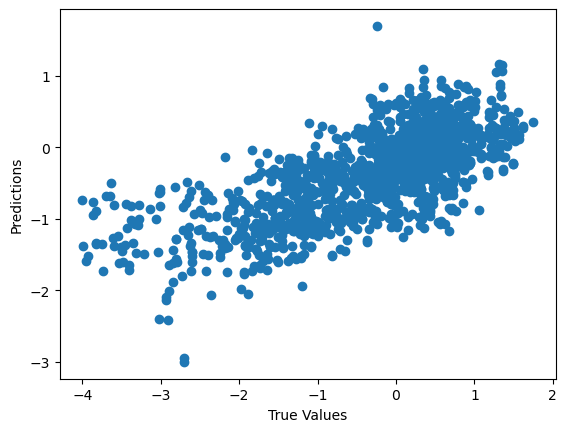

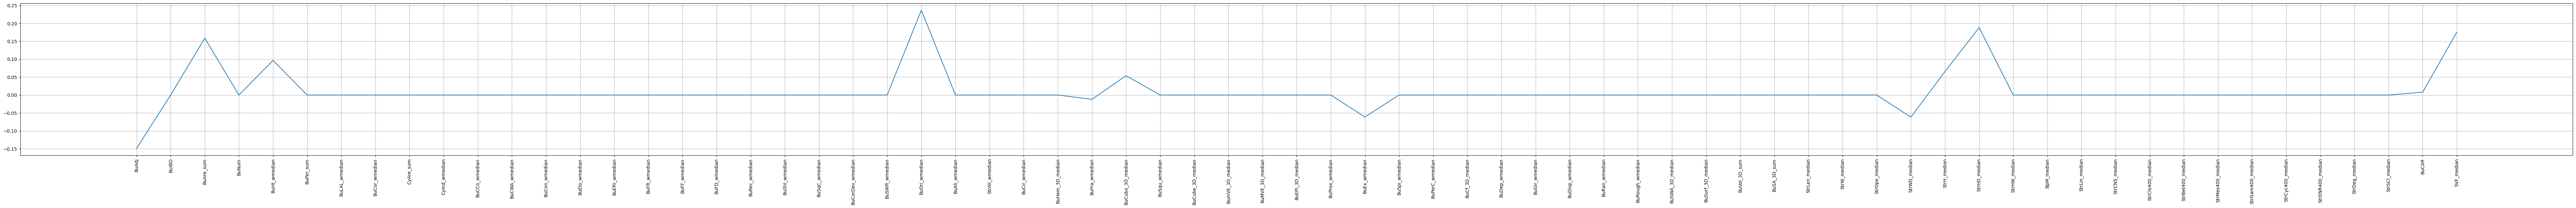

In [81]:
y = stn_buffers['Temperature_diff_K']

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# plot the coefficients of the lasso regression
plt.figure(figsize=(100, 6))
plt.plot(range(len(lasso.coef_)), lasso.coef_)
plt.xticks(range(len(X_final.columns)), X_final.columns, rotation=90)
plt.grid()
plt.show()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.7031894822634465
R2: 0.46564629788345147


In [83]:
# show the most important features
print(X_final.columns[abs(lasso.coef_) > 0.01])


Index(['BuAdj', 'BuAre_sum', 'BuHt_wmedian', 'BuOri_wmedian', 'BuFra_wmedian',
       'BuCubo_3D_median', 'BuEx_wmedian', 'StrWD_median', 'StrH_median',
       'StrHD_median', 'SVF_median'],
      dtype='object')


In [ ]:
# use this model on the other meteobike nights?

In [95]:
X_final

BuAdj      BuIBD     BuAre_sum  BuNum  BuHt_wmedian     BuPer_sum  \
0     0.313166  13.409902  49060.771496   9730        18.102  10057.805329   
1     0.300986  12.931618  48767.871903   9730        18.457   9745.012139   
2     0.287499  12.416912  47738.511277   9730        21.085   9224.306301   
3     0.246010  11.151026  51143.700528   9730        21.085   9997.791216   
4     0.171199   9.619872  59431.443755   9730        16.619  10824.565274   
...        ...        ...           ...    ...           ...           ...   
9725  0.254845  11.275779  60912.557501   9730        15.729  15184.851994   
9726  0.243049  10.725789  61161.237910   9730        15.600  15219.024006   
9727  0.221507  10.137010  57943.146674   9730        16.060  13936.639525   
9728  0.293893  12.786693  51771.650514   9730        18.102  10429.932002   
9729  0.319418  13.692246  49846.333476   9730        18.338  10189.468677   

      BuLAL_wmedian  BuCor_wmedian    CyAre_sum  CyInd_wmedian  ...  \
0         50.337414           18.0   582.855934            0.0  ...   
1         52.405793           18.0   582.855934            0.0  ...   
2         78.447794           18.0   582.855934            0.0  ...   
3         65.431944           18.0   582.855934            0.0  ...   
4         70.325781           16.0  1052.091183            0.0  ...   
...             ...            ...          ...            ...  ...   
9725      36.347855           11.0   170.681442            0.0  ...   
9726      36.796192           11.0   170.681442            0.0  ...   
9727      43.056499           14.0   553.133810            0.0  ...   
9728      52.405793           18.0   582.855934            0.0  ...   
9729      52.405793           18.0   503.000709            0.0  ...   

      StrClo400_median  StrBet400_median  StrMes400_median  StrGam400_median  \
0             0.000021             186.5          0.135802          0.430191   
1             0.000022             298.5          0.131591          0.427101   
2             0.000022             314.0          0.127385          0.424715   
3             0.000022             324.0          0.123457          0.422764   
4             0.000025             296.0          0.128205          0.423729   
...                ...               ...               ...               ...   
9725          0.000022             284.0          0.144000          0.434783   
9726          0.000022             284.0          0.144000          0.434783   
9727          0.000024             306.0          0.144000          0.434783   
9728          0.000021             191.0          0.131868          0.427536   
9729          0.000021             191.0          0.131868          0.428571   

      StrCyc400_median  StrENR400_median  StrDeg_median  StrSCl_median  \
0                 10.5          1.229968            3.0       0.052564   
1                 11.0          1.219234            3.0       0.034856   
2                 11.0          1.211794            3.0       0.015625   
3                 11.0          1.214286            3.0       0.000000   
4                 13.0          1.218750            3.0       0.000000   
...                ...               ...            ...            ...   
9725              12.0          1.250000            3.0       0.000000   
9726              12.0          1.250000            3.0       0.000000   
9727              13.0          1.255814            3.0       0.000000   
9728              11.0          1.229167            3.0       0.000000   
9729              10.0          1.225806            3.0       0.066667   

         BuCAR  SVF_median  
0     0.391041    0.665867  
1     0.388707    0.682190  
2     0.380502    0.687340  
3     0.407643    0.697683  
4     0.473701    0.725945  
...        ...         ...  
9725  0.485506    0.624914  
9726  0.487488    0.631460  
9727  0.461838    0.637670  
9728  0.412648    0.674708  
9729  0.397302    0.671400  

[6900 rows x 69 colu

In [96]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=41)

# Add constant to the training data
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Perform feature selection on training data only
def forward_selection(X, y):
    initial_features = X.columns.tolist()
    best_features = []
    while initial_features:
        pvals = []
        for feature in initial_features:
            X_temp = X[best_features + [feature]]
            model = sm.OLS(y, X_temp).fit()
            pvals.append((feature, model.pvalues[feature]))
        feature, pval = min(pvals, key=lambda x: x[1])
        if pval < 0.05:
            best_features.append(feature)
            initial_features.remove(feature)
        else:
            break
    return best_features

selected_features = forward_selection(X_train_const, y_train)

# Train model with selected features
model = sm.OLS(y_train, X_train_const[selected_features]).fit()

# Evaluate model on the test set
y_pred = model.predict(X_test_const[selected_features])
test_r_squared = model.rsquared

print("Selected Features:", selected_features)
print("Test R-squared:", test_r_squared)

Selected Features: ['BuAdj', 'BuOri_wmedian', 'BuLAL_wmedian', 'StrHD_median', 'StrWD_median', 'BuSpi_wmedian', 'SVF_median', 'BuPer_sum', 'BuCorDev_wmedian', 'BpM_median', 'BuDep_wmedian', 'BuHt_wmedian', 'BuFra_wmedian', 'BuCubo_3D_median', 'BuVol_3D_sum', 'StrGam400_median', 'StrSCl_median', 'BuCf_3D_median', 'CyAre_sum', 'BuAli_wmedian', 'BuCube_3D_median', 'BuIBD', 'StrW_median', 'BuFR_wmedian', 'BuSurf_3D_median', 'BuSWR_wmedian', 'BuSWA_3D_median', 'StrH_median', 'BuHem_3D_median', 'BuRan_wmedian', 'BuCCo_wmedian', 'StrAli_wmedian', 'BuElo_wmedian', 'StrCNS_median', 'CyInd_wmedian', 'StrDeg_median', 'StrBet400_median', 'StrClo400_median', 'StrENR400_median', 'BuEx_wmedian', 'StrLen_median', 'BuCor_wmedian', 'BuSA_3D_sum', 'StrHW_median']
Test R-squared: 0.6244944147333249


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3)

# Add constant to the training data
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)



selected_features = forward_selection(X_train_const, y_train)

# Train model with selected features
model = sm.OLS(y_train, X_train_const[selected_features]).fit()

# Evaluate model on the test set
y_pred = model.predict(X_test_const[selected_features])
test_r_squared = model.rsquared

print("Selected Features:", selected_features)
print("Test R-squared:", test_r_squared)

Selected Features: ['BuAdj', 'BuOri_wmedian', 'BuLAL_wmedian', 'StrHD_median', 'StrWD_median', 'BuCorDev_wmedian', 'BuSpi_wmedian', 'SVF_median', 'BuSA_3D_sum', 'BuFra_wmedian', 'BuHt_wmedian', 'BuVol_3D_sum', 'BuCubo_3D_median', 'BuCube_3D_median', 'BuCf_3D_median', 'BuIBD', 'StrW_median', 'BuDep_wmedian', 'StrSCl_median', 'StrGam400_median', 'CyAre_sum', 'BuAli_wmedian', 'BuEPI_3D_median', 'BuSurf_3D_median', 'BuHem_3D_median', 'BuRan_wmedian', 'BuCCo_wmedian', 'BuSWR_wmedian', 'BuSWA_3D_median', 'StrH_median', 'StrAli_wmedian', 'BuElo_wmedian', 'StrBet400_median', 'StrClo400_median', 'StrLen_median', 'BuFR_wmedian', 'BuCor_wmedian', 'StrDeg_median', 'StrENR400_median', 'BuCon_wmedian']
Test R-squared: 0.6149276225567641


In [97]:
best_features = forward_selection(X, y)
print("Best features:", best_features)

KeyboardInterrupt: 

In [98]:
# Get the regression coefficient (gradient) and R-squared
coefficients = model.params
r_squared = model.rsquared
print("Regression coefficients (gradient):", coefficients)
print("R-squared:", r_squared)

Regression coefficients (gradient): BuAdj                  -0.979209
BuOri_wmedian           0.031083
BuLAL_wmedian           0.007586
StrHD_median            0.168005
StrWD_median           -0.057512
BuSpi_wmedian           0.482369
SVF_median              1.892673
BuPer_sum               0.000067
BuCorDev_wmedian       -0.045415
BpM_median             -1.525255
BuDep_wmedian          -2.640242
BuHt_wmedian            0.049144
BuFra_wmedian          -7.103476
BuCubo_3D_median        5.226590
BuVol_3D_sum           -0.000001
StrGam400_median       -0.973476
StrSCl_median           2.304958
BuCf_3D_median        -12.673557
CyAre_sum              -0.000392
BuAli_wmedian           0.022584
BuCube_3D_median      -15.724081
BuIBD                  -0.019512
StrW_median             0.017900
BuFR_wmedian           -0.054950
BuSurf_3D_median        0.056392
BuSWR_wmedian           1.470962
BuSWA_3D_median        -0.001624
StrH_median             0.026906
BuHem_3D_median        33.579840
BuRan_w